In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("sales.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [7]:
df.info()
#the given summary includes list of all columns with their data types and the number of non-null values in each column.
#The given data has 1000 entries.
#14 columns are present in data.
#The given summary includes 3 data type that is float,int and object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [8]:
df.describe()
#Here the mean and median for order ID is almost same...around 5.5
#But we can see a rise in the mean from unit price onwards.
#Here mean >median thus there is positive skewness. Here there can be outliers.

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


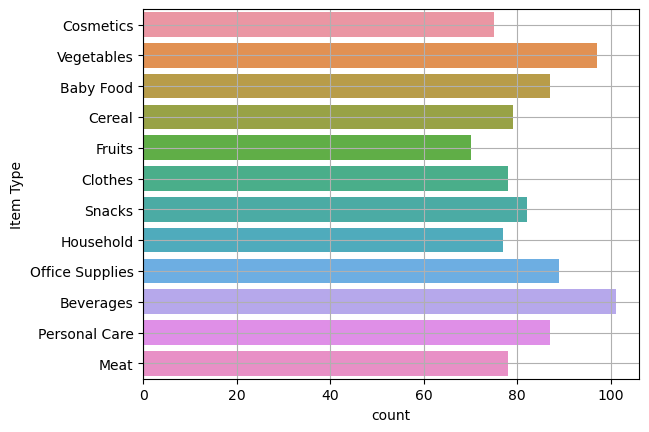

In [25]:
sns.countplot(data=df,y="Item Type")
plt.grid(True)
plt.show()
#In the above observation the sales of the Beverages is more than others.
#and the sales of fruits is very less than others.

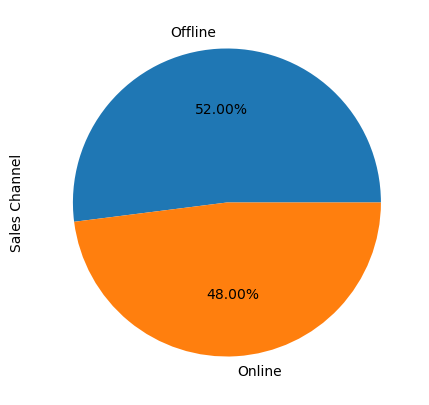

In [52]:
df['Sales Channel'].value_counts(normalize=True).plot(figsize=(5,5),kind='pie',autopct='%.2f%%')
plt.show()
#Here, the offline sales are greater than the online sales. 
#Online sales are approx upto 480 where as the offline ones are upto 520

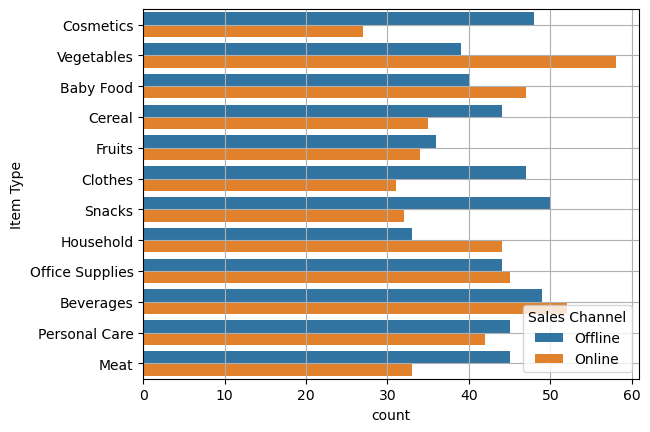

In [14]:
sns.countplot(data=df,y="Item Type",hue="Sales Channel")
plt.grid(True)
#Maximum offline sale is of snacks. Upto 50.
#Minimum offline sale is of household and it is upto 32
#Vegetables are having a maximum online sale of 58 and minimum online sale is of cosmetics of  27
#Office supplies are almost equally sold online as well as offline

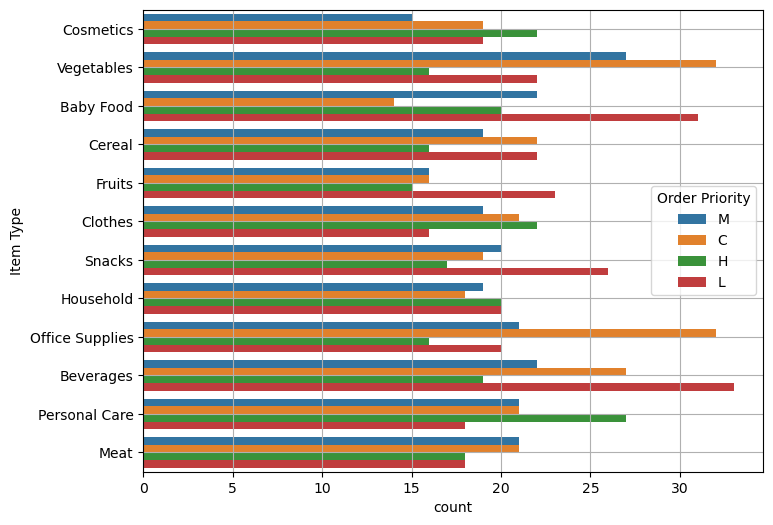

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,y="Item Type",hue="Order Priority")
plt.grid(True)
#Here,We can obeserve item type with respective order priority.

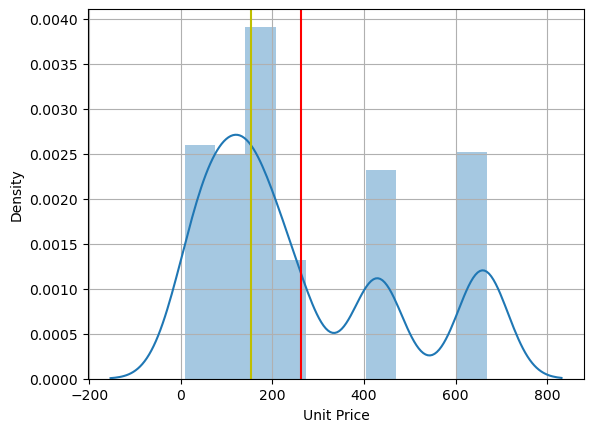

In [41]:
mean=df["Unit Price"].mean()
median=df["Unit Price"].median()
sns.distplot(df["Unit Price"])
plt.axvline(mean,color='r')
plt.axvline(median,color='y')
plt.grid(True)
#In the given observation Unit price is positively skewd.

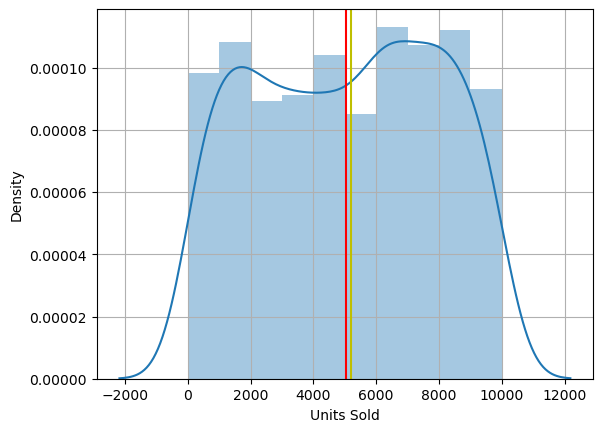

In [40]:
mean1=df["Units Sold"].mean()
median1=df["Units Sold"].median()
sns.distplot(df["Units Sold"])
plt.axvline(mean1,color='r')
plt.axvline(median1,color='y')
plt.grid(True)
#In the given observation Units sold is Normally Distributed.

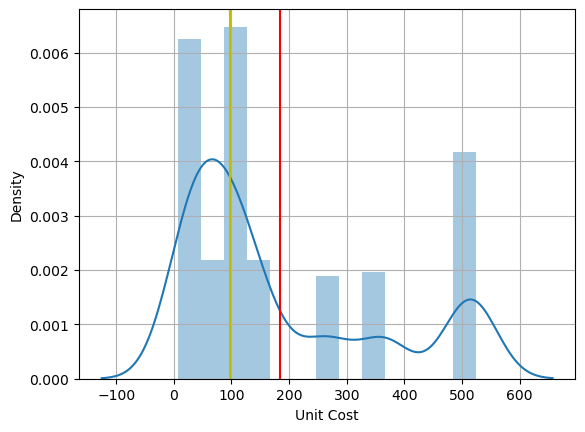

In [42]:
mean2=df["Unit Cost"].mean()
median2=df["Unit Cost"].median()
sns.distplot(df["Unit Cost"])
plt.axvline(mean2,color='r')
plt.axvline(median2,color='y')
plt.grid(True)
#In the given observation Unit Cost is positively skewd.
#Highest Unit cost is 90-130

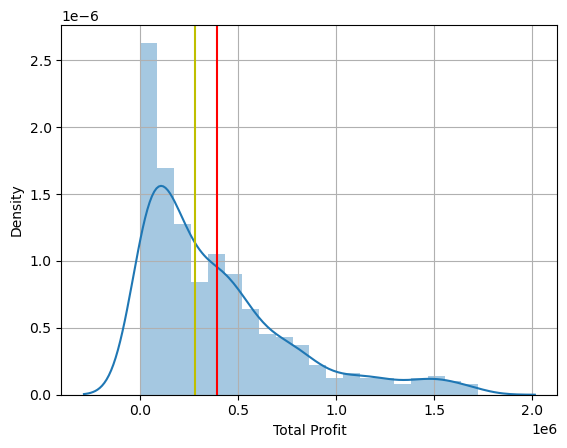

In [49]:
mean3=df["Total Profit"].mean()
median3=df["Total Profit"].median()
sns.distplot(df["Total Profit"])
plt.axvline(mean3,color='r')
plt.axvline(median3,color='y')
plt.grid(True)
#In the given observation Total Profit is Positively Skewd.